<a href="https://colab.research.google.com/github/Raynould-Joseph/Machine-Learning-/blob/main/KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Algoritum

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [10]:
iris=pd.read_csv('/content/sample_data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
del iris['Id']

In [28]:
iris.shape

(150, 5)

class of attributes

In [29]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
X=iris.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y=iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# data normalisation makes mean =0 and sd =1


In [37]:
X=preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

# Train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
y_test.shape

(30,)

In [51]:
import seaborn as sns

# drawing a heat map of the confusion matrix 

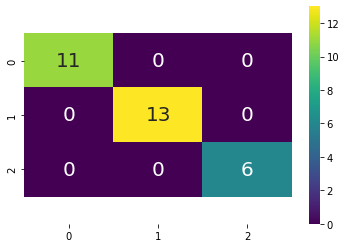

In [53]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)
ax=sns.heatmap(cm,annot=True,cmap="viridis",annot_kws={"size":20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Finding the best value of k

In [56]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    predict_i=knnmodel.predict(X_test)
    error_rate.append(np.mean(y_predict1!=y_test))
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

plotind the values to the 

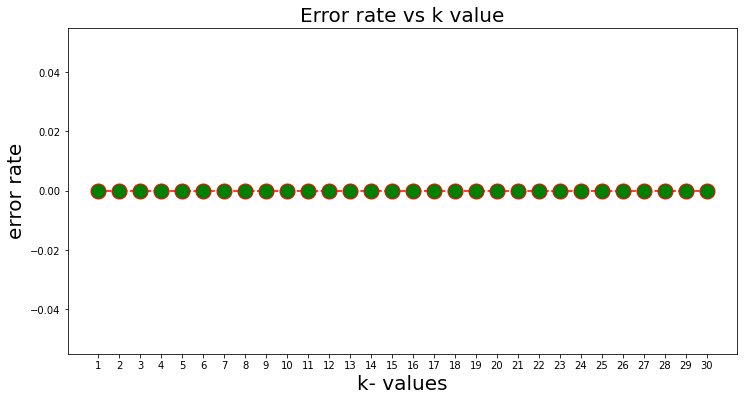

In [57]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

# accuracy of the model

In [41]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc

1.0

# confussion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test.values,y_predict1)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [45]:
cm1=pd.DataFrame(data=cm, index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,13,0
virginica,0,0,6


# output visuualsation

In [47]:
predicted_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict'])
predicted_output

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
y_test,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica
y_predict,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica


In [48]:
predicted_output.transpose()

,y_test,y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [49]:
predicted_output.iloc[0,:].value_counts()

Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: y_test, dtype: int64

# value of k